<a href="https://colab.research.google.com/github/miguelscagliottiolmedo/Data_Science/blob/main/Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de Datos con Matplotlib y Seaborn

La visualización de datos es una parte fundamental del análisis exploratorio de datos (EDA), ya que permite obtener insights rápidamente a través de representaciones gráficas. En Python, dos de las bibliotecas más utilizadas para la creación de gráficos son Matplotlib y Seaborn.


## [Matplotlib](https://matplotlib.org/)

Matplotlib es una biblioteca de visualización muy flexible y potente, que permite generar una amplia variedad de gráficos estáticos, animados e interactivos en Python. Su flexibilidad radica en que otorga control total sobre los elementos del gráfico, como las escalas, los colores, las etiquetas, etc.

Entre sus características más destacadas se encuentran:

*   Capacidad para crear gráficos como líneas, barras, histogramas, gráficos de dispersión y más.
*   Posibilidad de personalizar casi todos los aspectos del gráfico.
*   Integración con otras bibliotecas populares de ciencia de datos, como NumPy y pandas.





## [Seaborn](https://seaborn.pydata.org/)

Seaborn es una biblioteca construida sobre Matplotlib que facilita la creación de gráficos estadísticos más complejos y con menos código. Seaborn ofrece una serie de estilos predefinidos y funciones de alto nivel que hacen que la visualización de datos sea más simple y atractiva visualmente.

Entre sus características clave se encuentran:


*   Estilos visuales atractivos por defecto, facilitando la creación de gráficos bien formateados.
*   Funciones para gráficos estadísticos como mapas de calor (heatmaps), gráficos de barras (bar plots), gráficos de cajas (boxplots) y más.
*   Integración nativa con pandas para trabajar con DataFrames.






## Gráficos que veremos en la clase de hoy

En esta clase, exploraremos cómo crear diferentes tipos de gráficos utilizando Matplotlib y Seaborn, cada uno útil para visualizar distintos aspectos de los datos:

*   Bar Plot
*   Pie Plot
*   Histograma
*   Boxplot
*   Scatter Plot
*   Matriz de Correlación (Heatmap)


Cada uno de estos gráficos nos proporcionará una forma diferente de visualizar nuestros datos, ayudándonos a entender su distribución, identificar patrones y, en general, obtener conclusiones valiosas para un análisis posterior.













In [5]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/content/drive/MyDrive/ACADEMIC STUDIES/UTN - FRC/DATA ANALYTICS/UTN/Clase 7 - 04 10/Copy of registro_ventas_electrodomesticos.csv'
data = pd.read_csv(path)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Barplot

Un bar plot o gráfico de barras es una representación gráfica que utiliza barras rectangulares para mostrar y comparar la magnitud o frecuencia de diferentes categorías o grupos de datos. Las barras pueden ser horizontales o verticales, y la longitud de cada barra es proporcional al valor que representa.

**Cuándo utilizar un bar plot**
*   Comparar categorías: Es ideal para visualizar y comparar valores entre distintas categorías o grupos.
*   Resaltar diferencias: Ayuda a identificar rápidamente qué categoría tiene el valor más alto o más bajo.
*   Datos categóricos: Es útil cuando se trabaja con variables cualitativas o categóricas, como colores, productos, ciudades, etc.

**Ventajas**
*   Fácil de interpretar: Las diferencias en las longitudes de las barras son visualmente claras y sencillas de entender.
*   Versatilidad: Puede utilizarse tanto con datos positivos como negativos, y se adapta bien a conjuntos de datos pequeños y medianos.
*   Permite comparaciones rápidas: Es excelente para destacar las diferencias entre categorías de manera visual.


**Desventajas**
*   No adecuado para muchos grupos: Cuando hay demasiadas categorías o barras, puede volverse confuso y difícil de leer.
*   No representa bien relaciones complejas: No es ideal para mostrar tendencias o relaciones entre variables, ya que solo compara magnitudes.
*   Elemento de lista

**Detalles adicionales**
*   Los bar plots apilados permiten mostrar subcategorías dentro de cada barra, lo que puede ser útil para mostrar la composición de cada grupo.
*   Las bar plots agrupadas permiten comparar varias series de datos a la vez, mostrando conjuntos de barras juntas para cada categoría.





In [9]:
data.head()

,Fecha de venta,Vendedor,Sucursal,Producto,Precio unitario,Cantidad,Monto total
0,2024-03-04,Juan Pérez,Sucursal Oeste,Aspiradora,300,3,900
1,2024-04-22,Juan Pérez,Sucursal Norte,Lavadora,500,4,2000
2,2024-07-14,Luis Ramírez,Sucursal Este,Televisor,1200,5,6000
3,2024-06-22,María García,Sucursal Este,Aspiradora,300,4,1200
4,2024-04-17,María García,Sucursal Oeste,Microondas,150,5,750


In [10]:
data.groupby("Producto", as_index=False)["Monto total"].sum()

,Producto,Monto total
0,Aspiradora,4200
1,Lavadora,13500
2,Microondas,5100
3,Refrigerador,17500
4,Televisor,45600


In [11]:
data.groupby("Producto")["Monto total"].sum()

,Monto total
Producto,
Aspiradora,4200
Lavadora,13500
Microondas,5100
Refrigerador,17500
Televisor,45600


In [12]:
data_agg = data.groupby("Producto", as_index=False)["Monto total"].sum()
data_agg["Q_Total"] = data.groupby("Producto", as_index=False)["Cantidad"].sum()["Cantidad"]
data_agg

,Producto,Monto total,Q_Total
0,Aspiradora,4200,14
1,Lavadora,13500,27
2,Microondas,5100,34
3,Refrigerador,17500,25
4,Televisor,45600,38


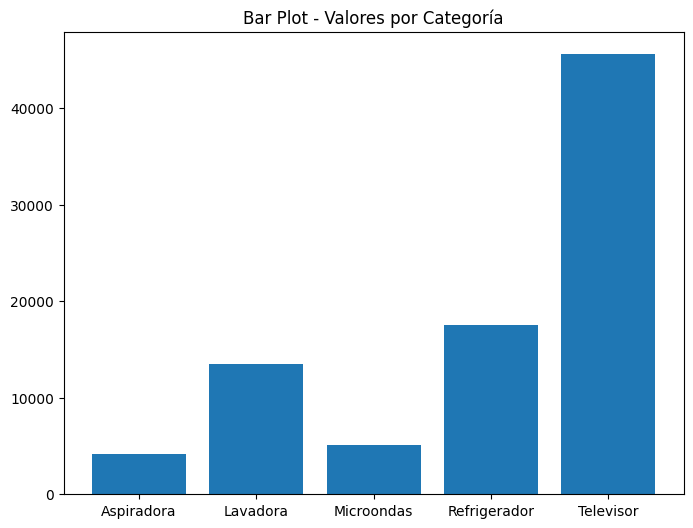

In [13]:
# Con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(x = data_agg["Producto"], height = data_agg["Monto total"])
plt.title('Bar Plot - Valores por Categoría')
plt.show()

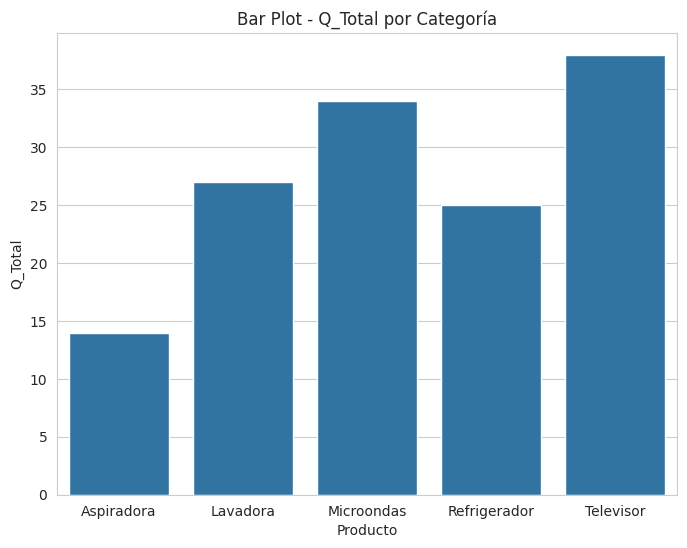

In [14]:
sns.set_style("whitegrid")

# En la variable ax, se guardara el barplot propiamente dicho
ax = sns.barplot(x='Producto', y='Q_Total', data=data_agg)

# Agrego algunas configuraciones

# Aquí el titulo
ax.set_title('Bar Plot - Q_Total por Categoría')

# El tamaño del plot
plt.gcf().set_size_inches(8, 6)
plt.show()

In [15]:
def bar_plot(category, values, data):
  ax = sns.barplot(x=category, y=values, data=data)
  ax.set_title(f'Bar Plot - {values} por {category}')
  plt.gcf().set_size_inches(8, 6)
  plt.show()

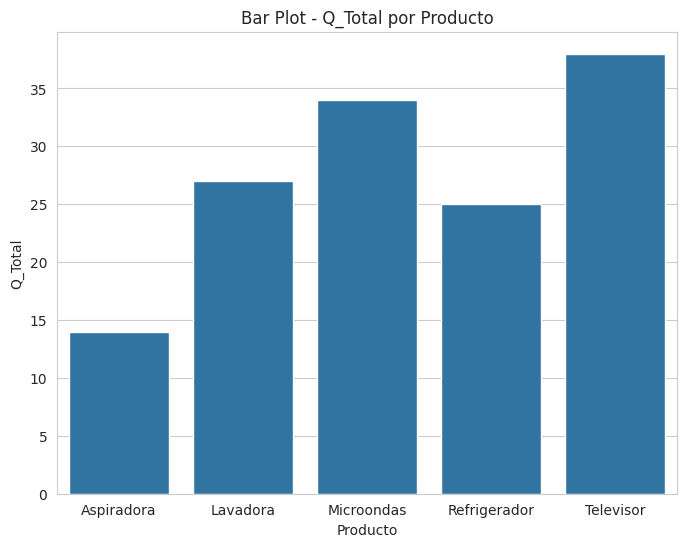

In [16]:
bar_plot(category = "Producto",
         values= "Q_Total",
         data=data_agg)

## Pie Plot

Un pie plot o gráfico de torta es una representación gráfica circular que se utiliza para mostrar la proporción o el porcentaje de un todo dividido en varias partes. Cada sector del gráfico representa una categoría y su tamaño es proporcional a su porcentaje del total.

**Cuándo utilizar un pie plot**
*   Mostrar proporciones: Es ideal para visualizar cómo se distribuye un todo en varias partes.
*   Destacar una parte del total: Es útil cuando se quiere resaltar la contribución de una categoría específica en relación al todo.
*   Evidencia Debalances de clases: Si en el dataset, una feature tiene un desbalance de clase muy marcado, es una buena alternativa este tipo de plots.

**Ventajas**
*   Fácil de interpretar: Los sectores del gráfico son visualmente claros para mostrar proporciones relativas.
*   Buen impacto visual: Especialmente útil para destacar partes mayores o menores de un todo.
*   Representación clara de un solo conjunto de datos: Es muy útil cuando se tiene un solo grupo o categoría a analizar.

**Desventajas**
*   Difícil de comparar con precisión: No es fácil hacer comparaciones exactas entre los sectores, especialmente si las diferencias son pequeñas.
*   Limitado a pocos segmentos: Cuando hay muchas categorías, los sectores se vuelven muy pequeños y el gráfico puede ser difícil de leer.
*   No muestra relaciones entre categorías: No es adecuado para representar relaciones o cambios entre datos como lo haría un gráfico de barras o de líneas.

**Detalles adicionales**
*   Los pie plots pueden incluir etiquetas o porcentajes en los sectores para mejorar la interpretación.
*   Los gráficos de torta 3D suelen ser evitados en análisis más serios porque pueden distorsionar las proporciones reales y confundir al espectador.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_plot(data, value, category):
    # Asegúrate de que estamos trabajando con los valores como arreglos de NumPy
    values = data[value].values
    categories = data[category].values

    # Configuración de la figura
    plt.figure(figsize=(8, 8))

    # Colores y detalles
    colors = sns.color_palette("pastel")

    # Generación del gráfico de pastel
    wedges, texts, autotexts = plt.pie(
        values,
        labels=categories,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1},
        textprops={'color': "black"},
    )

    # Título
    plt.title(f'Distribución por {category}', fontsize=16, fontweight='bold', pad=20)

    # Ajuste de tamaño de las etiquetas de porcentaje
    for autotext in autotexts:
        autotext.set_size(10)
        autotext.set_weight('bold')
        autotext.set_color('black')

    # Leyenda
    plt.legend(wedges, categories, title=category, loc="center left", bbox_to_anchor=(0.9, -0.4, 0.5, 1))

    plt.tight_layout()
    plt.show()


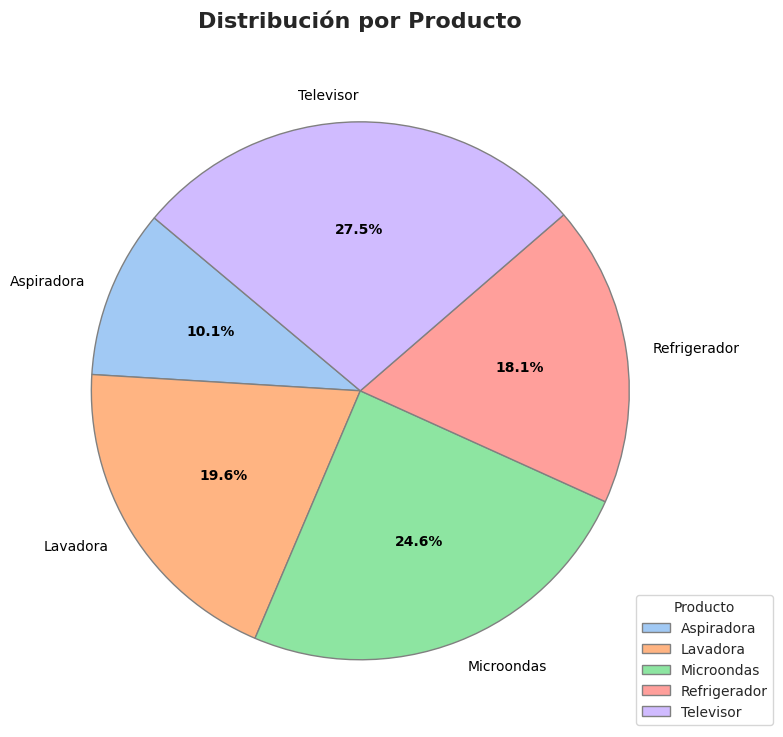

In [32]:
pie_plot(data_agg, "Q_Total", "Producto")

## Histograma

Un histograma es una representación gráfica que muestra la distribución de una variable numérica continua mediante la división de los datos en intervalos o "bins". Las barras de un histograma indican la frecuencia de los datos dentro de cada intervalo, lo que permite observar la forma, dispersión y patrones en la distribución de los datos.

**Cuándo utilizar un histograma**
*   Entender la distribución de los datos: Es ideal para analizar cómo se distribuyen los valores de una variable en diferentes rangos.
*   Identificar sesgos o simetrías: Permite ver si los datos están sesgados hacia un lado, o si tienen una distribución simétrica.
*   Analizar la variabilidad: Muestra qué tan dispersos están los datos en torno a la media o centro de la distribución.

**Ventajas**
*   Muestra patrones de distribución: Es excelente para identificar la forma general de los datos (por ejemplo, normal, sesgada, multimodal).
*   Facilita la detección de anomalías: Los valores atípicos o outliers pueden ser identificados fácilmente.
*   Visualiza grandes conjuntos de datos: Es útil cuando se tiene una gran cantidad de datos continuos que necesitan ser clasificados en intervalos.

**Desventajas**
*   Dependencia en el número de intervalos: La interpretación puede variar dependiendo del número de "bins" elegidos. Si hay muy pocos, se pierde detalle, y si hay demasiados, se puede generar ruido.
*   No adecuado para datos categóricos: Solo es útil para datos numéricos continuos, no para datos cualitativos o categóricos.
*   Menos efectivo para pequeños conjuntos de datos: Si el conjunto de datos es pequeño, el histograma puede no representar adecuadamente la distribución.

**Detalles adicionales**
*   Los histogramas son útiles para comparar distribuciones, aunque se recomienda usar superposiciones o dividir los gráficos para comparaciones más claras.
*   En algunos casos, un gráfico de densidad puede complementar un histograma para una representación más suave de la distribución.

In [ ]:
def histograma(data, category):

    # Creación de la figura con Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(data[category], kde=True) #llamamos al método histplot desde Seaborn
#Lo guardamos en una variable que se llama ax. Como hago para agregarle titulo, nombres de los ejes, tamaño de la letra, etc. Puedo aplicar las configuraciones sobre el gráfico que cree más arriba. Con el nombre ax.
#Entonces igualo eso a ax y luego puedo editar el gráfico

    # Configuración del título y ejes
    ax.set_title(f'Histograma - Distribución de {category}', fontsize=14)
    ax.set_xlabel(category, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

    # Rotación de las etiquetas del eje X --> esto cuando las etiquetas del eje x son muy largas. Tb podemos alargar el gráfico
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

In [ ]:
#Así como nosotros antes hacíamos la desgregación por producto, ahora no hace falta.
#le damos pd.to_datetime para darle el formato específico a la fecha y poder modificarlos correctamente

data = data.sort_values(by='Fecha de venta', ascending=True)
data['Fecha de venta'] = pd.to_datetime(data['Fecha de venta'])
data['Año-Mes'] = data['Fecha de venta'].dt.strftime('%Y-%m')


In [ ]:
data.head()

,Fecha de venta,Vendedor,Sucursal,Producto,Precio unitario,Cantidad,Monto total,Año-Mes
34,2024-01-02,Pedro López,Sucursal Sur,Microondas,150,2,300,2024-01
15,2024-01-13,Juan Pérez,Sucursal Este,Refrigerador,700,2,1400,2024-01
33,2024-01-19,Luis Ramírez,Sucursal Sur,Aspiradora,300,2,600,2024-01
14,2024-01-27,Juan Pérez,Sucursal Norte,Refrigerador,700,1,700,2024-01
7,2024-01-28,Ana Fernández,Sucursal Este,Televisor,1200,1,1200,2024-01


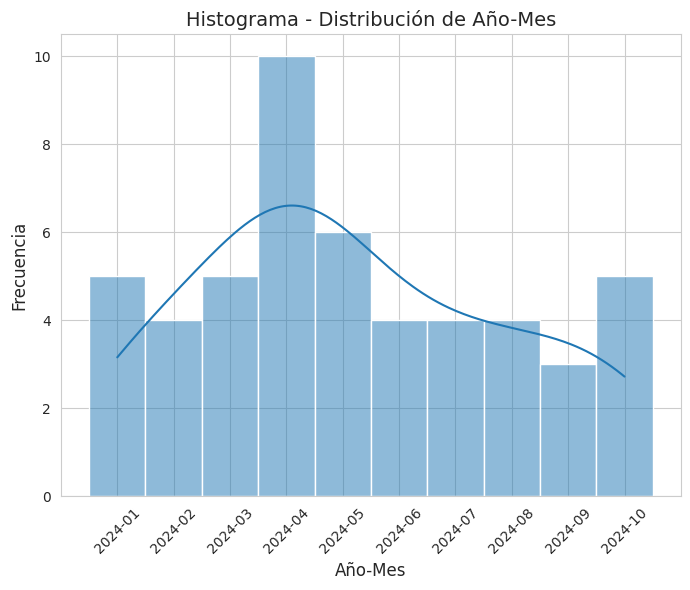

In [ ]:
histograma(data, "Año-Mes")

## Boxplot

Un boxplot o gráfico de caja es una representación gráfica que muestra la distribución de un conjunto de datos numéricos a través de sus cuartiles. El gráfico se compone de una caja que encapsula el rango intercuartílico (IQR), con una línea dentro que marca la mediana. Las "bigotes" o líneas que salen de la caja indican el rango de los datos, y los puntos fuera de estos bigotes pueden considerarse valores atípicos.

**Cuándo utilizar un boxplot**
*   Comparar distribuciones: Es útil para comparar la distribución de datos entre diferentes categorías o grupos.
*   Identificar outliers: Es ideal para identificar valores atípicos o extremos que se encuentran fuera del rango esperado.
*   Visualizar la variabilidad: Permite ver rápidamente la dispersión de los datos, la simetría y las posibles anomalías.

**Ventajas**
*   Resumen visual eficaz: Proporciona un resumen rápido de la distribución de los datos (mediana, cuartiles, y valores extremos) en un solo gráfico.
*   Fácil detección de outliers: Resalta los valores atípicos de forma clara y visual.
*   Comparación eficiente entre grupos: Es útil cuando se quiere comparar la dispersión y la tendencia central de varios grupos de datos.

**Desventajas**
*   Poca información sobre la distribución interna: No proporciona detalles sobre la forma de la distribución dentro del rango intercuartílico.
*   No tan intuitivo como otros gráficos: Puede ser menos fácil de interpretar para personas sin experiencia en estadística.
*   Menos útil para pequeñas muestras de datos: Si el conjunto de datos es pequeño, el boxplot puede no ofrecer mucha información significativa.

**Detalles adicionales**
*   Los boxplots pueden ser orientados tanto horizontal como verticalmente, y a menudo se utilizan en conjunto con otros gráficos (como histogramas o gráficos de violín) para proporcionar un análisis más completo de la distribución.
*   Es especialmente útil en el análisis exploratorio de datos (EDA) cuando se necesita una vista rápida de la variabilidad y los outliers de los datos.

In [ ]:
def boxplot(data, category, value):
    # Configuración de estilo de Seaborn
    sns.set(style="whitegrid", palette="muted")

    # Creación del gráfico con Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x=category, y=value, data=data)

    # Configuración del título y ejes
    ax.set_title(f'Boxplot - {value} por {category}', fontsize=14)
    ax.set_xlabel(category, fontsize=12)
    ax.set_ylabel(value, fontsize=12)

    # Mostrar el gráfico
    plt.show()

In [ ]:
data[data["Producto"]=="Refrigerador"]["Cantidad"]

,Cantidad
15,2
14,1
42,2
24,3
44,1
6,4
19,2
39,3
47,2
37,5


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


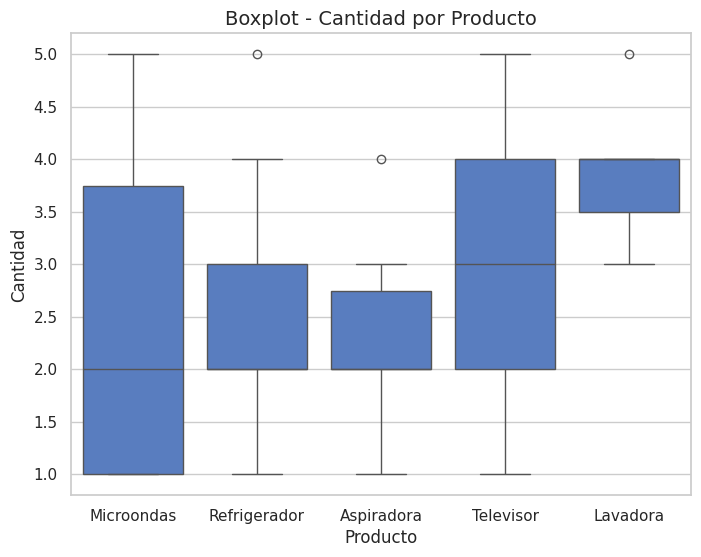

In [ ]:
boxplot(data, category='Producto', value='Cantidad')

## Scatter Plot

Un scatter plot o gráfico de dispersión es una representación gráfica que utiliza puntos para mostrar la relación entre dos variables numéricas. Cada punto en el gráfico representa un par de valores (x, y), y la distribución de los puntos puede revelar patrones, correlaciones o tendencias entre las dos variables.

**Cuándo utilizar un scatter plot**
*   Identificar correlaciones: Es ideal para visualizar la relación o correlación entre dos variables.
*   Detectar tendencias: Permite observar si existe una tendencia ascendente, descendente, o si los datos están dispersos sin patrón claro.
*   Visualizar la densidad de los datos: Los puntos agrupados o dispersos pueden indicar la concentración de los valores en ciertas áreas del gráfico.

**Ventajas**
*   Claridad visual: Muestra claramente cómo dos variables están relacionadas, permitiendo una interpretación visual rápida de tendencias.
*   Identificación de relaciones no lineales: Es útil para ver relaciones complejas, como curvas, que un gráfico de barras no puede mostrar.
*   Detectar outliers: Los puntos que están aislados del resto indican valores atípicos o posibles anomalías.

**Desventajas**
*   Menos útil para grandes volúmenes de datos: Con muchos puntos, el gráfico puede volverse desordenado y difícil de leer.
*   No siempre revela relaciones causales: Muestra correlación, pero no implica causalidad entre las variables.
*   Requiere variables numéricas: No es adecuado para datos categóricos, ya que solo funciona con datos cuantitativos.

**Detalles adicionales**
*   Los scatter plots pueden incluir líneas de tendencia para resaltar visualmente la correlación entre las variables.
*   El uso de colores o tamaños diferentes en los puntos permite agregar otra dimensión de información (por ejemplo, categorizar grupos o añadir una tercera variable).

In [ ]:
def scatter_plot(data, category, value, hue):

    # Creación del gráfico de dispersión con Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x=category, y=value, data=data, hue=hue, palette='Set1')
    #con hue puedo añadir otro nivel de información. En este caso con las sucursales

    # Configuración del título y ejes
    ax.set_title(f'Scatter Plot - {value} vs {category}', fontsize=14)
    ax.set_xlabel(category, fontsize=12)
    ax.set_ylabel(value, fontsize=12)

    # Mostrar el gráfico
    plt.show()


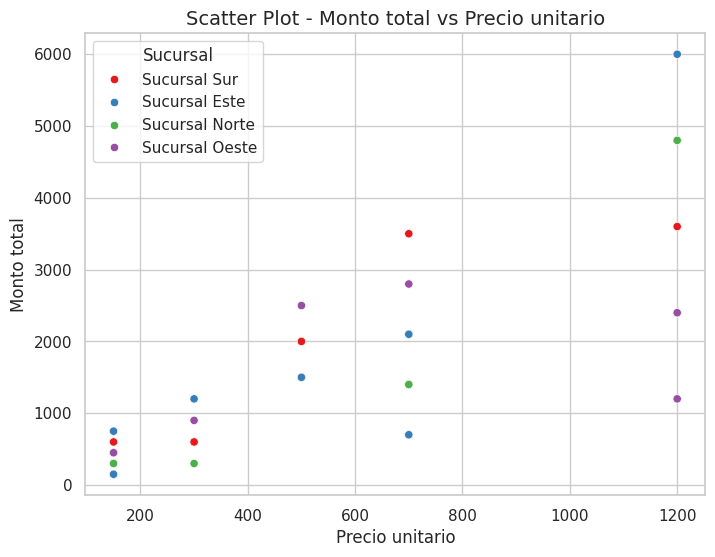

In [ ]:
scatter_plot(data, "Precio unitario", "Monto total", "Sucursal")

## Matriz de Correlación

Una matriz de correlación es una representación en forma de tabla que muestra las relaciones entre múltiples variables numéricas. Cada celda en la tabla contiene un valor que mide la correlación entre dos variables, generalmente con coeficientes de correlación de Pearson, que varían entre -1 y 1. Estos valores indican la dirección y la fuerza de la relación entre las variables.

**Cuándo utilizar una matriz de correlación**
*   Identificar relaciones entre varias variables: Es ideal cuando se quiere evaluar rápidamente cómo se relacionan múltiples variables entre sí.
*   Detectar colinealidad: Permite detectar variables que están altamente correlacionadas, lo que puede ser problemático en modelos de regresión.
*   Exploración de datos: Útil en el análisis exploratorio de datos (EDA) para comprender las dependencias entre variables.

**Ventajas**
*   Comparación rápida y clara: Permite ver todas las correlaciones entre las variables en un solo lugar, facilitando la comparación.
*   Identificación de relaciones lineales: Es excelente para detectar relaciones lineales positivas o negativas entre las variables.
*   Eficiente con grandes cantidades de datos: Puede analizar múltiples variables al mismo tiempo, lo que ahorra tiempo en lugar de hacer comparaciones una por una.

**Desventajas**
*   No muestra relaciones no lineales: La matriz solo refleja correlaciones lineales, por lo que las relaciones más complejas pueden no ser capturadas.
*   No indica causalidad: Muestra correlaciones, pero no sugiere la dirección de la relación ni si una variable causa el cambio en otra.
*   Interpretación de valores intermedios: Correlaciones cercanas a cero pueden ser difíciles de interpretar, ya que no muestran una relación clara.

**Detalles adicionales**
*   La matriz de correlación a menudo se visualiza como un **heatmap** (mapa de calor), donde los colores indican la fuerza de la correlación.
*   Es importante tener en cuenta que una correlación alta no siempre implica una relación causal, por lo que se deben considerar otras métricas y análisis adicionales.

In [ ]:
def matriz_correlacion(data):
    plt.figure(figsize=(8, 6))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()

In [ ]:
## preparacion de los datos antes de hacer la matriz
from sklearn.preprocessing import LabelEncoder # Libreria para desarrollar Machine Learning

def label_encoder(data, columns):

    for column in columns:
        # Inicializar el LabelEncoder
        encoder = LabelEncoder()

        # Ajustar y transformar la columna
        data[column+'_encoded'] = encoder.fit_transform(data[column])

    return data

In [ ]:
def matriz_correlacion(data):
  plt.figure(figsize=(8, 6))
  corr = data.corr()
  sns.heatmap(corr, annot=True, cnap='coolwarm', linewidths=0.5)
  plt.title('Matriz de Correlación')
  plt.show

In [ ]:
df_encoded = label_encoder(data,["Vendedor","Sucursal","Producto"])
#como sabemos que las variables son categoricas, las encodeamos

In [ ]:
df_encoded.head()

,Fecha de venta,Vendedor,Sucursal,Producto,Precio unitario,Cantidad,Monto total,Año-Mes,Vendedor_encoded,Sucursal_encoded,Producto_encoded
34,2024-01-02,Pedro López,Sucursal Sur,Microondas,150,2,300,2024-01,4,3,2
15,2024-01-13,Juan Pérez,Sucursal Este,Refrigerador,700,2,1400,2024-01,1,0,3
33,2024-01-19,Luis Ramírez,Sucursal Sur,Aspiradora,300,2,600,2024-01,2,3,0
14,2024-01-27,Juan Pérez,Sucursal Norte,Refrigerador,700,1,700,2024-01,1,1,3
7,2024-01-28,Ana Fernández,Sucursal Este,Televisor,1200,1,1200,2024-01,0,0,4


In [ ]:
df_matriz_correlacion = df_encoded[["Precio unitario","Cantidad", "Monto total",	"Vendedor_encoded","Sucursal_encoded","Producto_encoded"]]

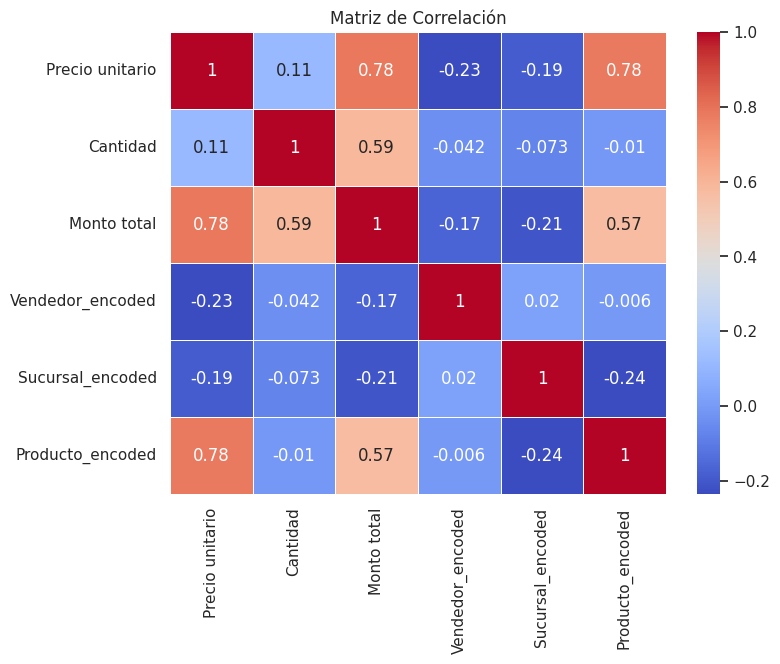

In [ ]:
matriz_correlacion(df_matriz_correlacion)